# Iterative methods for solving nonlinear systems of equations
by [Richard Tsai](https://www.researchgate.net/profile/Richard_Tsai3)

* Direct generalization of the **fixed-point iterations** for a single equation
$$ x_{k+1}:=g(x_k) $$ with $x_k$ being a vector and $g(x_k)$ also. Here, 
$$g:\mathbb{R}^d \mapsto \mathbb{R}^d.$$

* Fixed point of $g$ corresponds to the solution of $f(x)=0$.
* Generalization of  **Jacobi** and **Gauss-Seidel** iterations to solve nonlinear systems:

* **Newton's method**. Caution: need to solve a linear system at every iteration. 

    Generally difficult and costly for large systems. 
    
    Try use **quasi-Newton method**.

# Fixed point iterations for systems of equations

Learning objectives:
* The existence of a fixed point of $g$. 
* The convergence theory of the fixed point iterations.
* Theorem 10.6 in Burden and Faires covers both issues.
* Know how to use Gauss-Seildel iterations to solve nonlinear systems.
* Know Newton's method and the quasi-Newton's method, called Broyden's method.
* Know how to derive the Jacobian matrix of a given nonlinear equation.


## Gauss-Seidel iterations for solving nonlinear systems

### Example: solving the steady-state viscous Burger's equation

$$ uu_x = \epsilon u_{xx},\,\,\,\,\,0<x<1, $$ 
with boundary conditions
$$u(0)=1,\,\,u(1)=-1. $$

Discretize on a uniform grid with step size $h$.

$u(x_j) \approx u_j $

$u_x(x_j) \approx (u_{j+1}-u_{j-1})/2h $

$u_{xx}(x_j) \approx (u_{j+1}-2u_j+u_{j-1})/h^2 $

We are lead to a system involving the unknowns $u_1,u_2,\cdots, u_{n-1}$ with the boundary conditions $u_0=1$ and $u_n=-1$:

$$ u_j \frac{u_{j+1}-u_{j-1}}{2h} = \epsilon\frac{u_{j+1}-2u_j+u_{j-1}}{h^2}, j=1,2,\cdots,n-1.\,\,\,\,\, (P1)$$

The above equations can be organized into:
$$f(u_1,u_2,\cdots,u_{n-1})=(f_1(u_1,u_2,\cdots,u_{n-1}), f_2(u_1,u_2,\cdots,u_{n-1}),\cdots, f_{n-1}(u_1,u_2,\cdots,u_{n-1}))^\top = 0,$$
where
$$ f_j(u_1,u_2,\cdots,u_{n-1}):=u_j \frac{u_{j+1}-u_{j-1}}{2h} - \epsilon\frac{u_{j+1}-2u_j+u_{j-1}}{h^2}.$$

In the following, we use Gauss-Seidel iterations to solve this system.

Let us first re-arrange the system into a more convenient form: for $k=1,2,\cdotsfor $j=1,2,\cdots,n-1$
 
$$ \left(2\frac{\epsilon}{h^2}+\frac{u_{j+1}^{(k)}-u_{j-1}^{(k+1)}}{2h}\right)u_j^{(k+1)} = \epsilon\frac{u_{j+1}^{(k)}+u_{j-1}^{(k+1)}}{h^2} $$

We solve for $u_j^{(k+1)}$ by an explicit formula. 

** In general, you might want to use Newton's method for solve the resulting nonlinear system of equations **

### Homework:
Derive the Jacobian of the nonlinear system (P1) and solve it by Newton's method.

In [2]:
function GaussSeidel_Burgers!(u, h, ϵ, nitrs)
    
    half_h=h/2.0
    
    for t=1:nitrs
    for j=2:length(u)-1
            coeff = (2ϵ+ half_h*(u[j+1]-u[j-1]))
            
            u[j] = ϵ*(u[j+1]+u[j-1])/coeff
    end
    end
end

GaussSeidel_Burgers! (generic function with 1 method)

k= 1: 0.000420187392,	 7.986026111337
k= 2: 0.001799711694,	 5.547493974707
k= 3: 0.001214294211,	 4.130644042113
k= 4: 0.001201154148,	 3.091776803341
k=

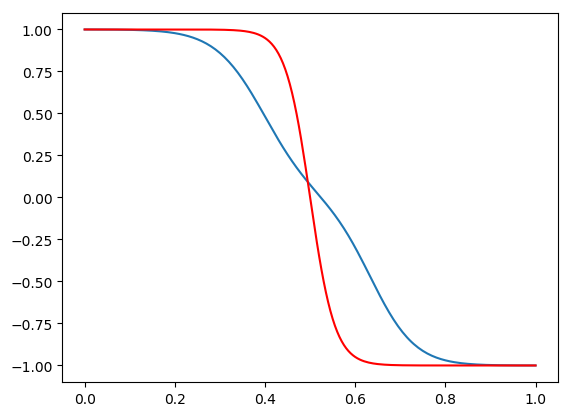

 5: 0.000970486365,	 2.405141480821
k= 6: 0.000706687190,	 0.942200691795
k= 7: 0.000110332384,	 0.116033574832
k= 8: 0.000001637596,	 0.001522042857
k= 9: 0.000000000183,	 0.000000222835


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13f9b6dd0>

In [40]:
x=linspace(0,1,201)
u=zeros(201)

h=x[2]-x[1]
ϵ=0.0275

#specify the boundary conditions
u[1]=1.0
u[end]=-1.0

GaussSeidel_Burgers!(u,h,ϵ,750)

plot(x, u)

## Newton's method for systems
$f:\mathbb{R}^d \mapsto \mathbb{R}^d$; i.e. $f$ maps a vector of $d$ component, x, to a vector of $d$ component, denoted by $f(x_k)$. 

$f(x_*)=0$. Taylor expansion gives
$$f(x_*) = 0=f(x_k)+f^\prime(x_k)(x_*-x_k)+\ldots$$

Replace $x_*$ by $x_{k+1}$ yields Newton's method:
$$ f^\prime(x_k)(x_{k+1}-x_k))=-f(x_k), $$
where  the derivative $f^\prime(x)$ is a $d\times d$ matrix.

Here, the $g$ function that defines the fixedpoint iterations is: 
$$ g(x) := x-f^\prime(x)^{-1} f(x) $$

Typical algorithm would do:
* Form $A_k:= f^\prime(x_k)$ (this could be already expensive to compute
* Solve $A_k z = -f(x_k)$, and obtain $z$
* Update $x_{k+1} := z+x_k$

In [41]:
function Newton!(x, F::Function, JF::Function, h, ϵ; nitrs=10, tol=1e-12)
   
    for k in 1:nitrs
        
        f=F(x)
        
               
        if norm(f)<tol
           break 
        end
        
        #Solve BΔx=-F(x)  for Δx
        Δx=-JF(x)\f

        #Update x
        x.+=Δx
        
        @printf "k=%2d: %1.12f,\t %1.12f\n" k norm(f) norm(Δx)

    end
end

Newton! (generic function with 1 method)

# Worked example: Problem 5.22 in Gander-Gander-Kwok

* radius of pipe: $r=4$

* rope length: $L=30$

Find the distance of the pipe to the ceiling above: $h$.

## Setting up equations: 

* Need to variables to describe the system. $h$ and $\theta$

* radius of pipe = r  = $(h+r)\cos\theta$

* length of rope = L = (length of rope wrapping around the pipe) + (legth of rope in the air) $$L = 2\left( r(\pi - \theta) + (h+r)\sin\theta \right)$$

* Obtain two equations: 
$$f(h,\theta):=\left(\begin{array}{c}
f_{1}(h,\theta)\\
f_{2}(h,\theta)
\end{array}\right)=\left(\begin{array}{c}
(h+4)\cos\theta-4\\
(h+4)\sin\theta+4(\pi-\theta)-15
\end{array}\right)=\left(\begin{array}{c}
0\\
0
\end{array}\right)
$$

* Derivative of $f$: $$f^{\prime}(h,\theta)=\left(\begin{array}{cc}
\frac{\partial f_{1}}{\partial h} & \frac{\partial f_{1}}{\partial\theta}\\
\frac{\partial f_{2}}{\partial h} & \frac{\partial f_{2}}{\partial\theta}
\end{array}\right)=\left(\begin{array}{cc}
\cos\theta & -(h+4)\sin\theta\\
\sin\theta & (h+4)\cos\theta-4
\end{array}\right)$$

In [ ]:
f(h,θ)  = [ (h+4.0)*cos(θ)-4.0; (h+4.0)*sin(θ)+4.0*(π-θ)-15.0]

f′(h,θ) = [cos(θ) -(h+4.0)*sin(θ); sin(θ)  (h+4.0)*cos(θ)-4.0] 

Newton_prob522(x) = x - f′(x[1],x[2])\f(x[1],x[2]) #this is not usually how one should run Newton's method

In [ ]:
#x is an array used to store the approximations computed along the iterations
#solution at the k-th iteration is x[:,k]
#function assumes that x[:,1] is the assigned initial guess
function FixedPointItrs!(x::Array{Float64,2}, g)
    for k=1:size(x,2)-1
        x[:,k+1]=g(x[:,k])
    end
end


In [ ]:
x0=[ 9.0; π/3.0]
x=zeros(2, 7)
x[:,1]=x0

FixedPointItrs!(x,Newton_prob522)

x

In [ ]:
println("Verify that the equations are solved (f should be essentially 0): f = ", f(x[1, end], x[2,end]))

h, θ=x[:, end]

if norm(f(x[1, end], x[2,end]))<1e-10
    println("\nFound a solution: h=",round(h,10), ", θ=", round(θ,10))
else
    println("\nNewton method fails.")
end

### Example: solving the steady-state viscous Burger's equation

$$ uu_x = \epsilon u_{xx},\,\,\,\,\,0<x<1, $$ 
with boundary conditions
$$u(0)=1,\,\,u(1)=-1. $$

We are lead to a system involving the unknowns $u_1,u_2,\cdots, u_{n-1}$ with the boundary conditions $u_0=1$ and $u_n=-1$:

$$ u_j \frac{u_{j+1}-u_{j-1}}{2h} = \epsilon\frac{u_{j+1}-2u_j+u_{j-1}}{h^2}, j=1,2,\cdots,n-1.\,\,\,\,\, (P1)$$

The above equations can be organized into:
$$f(u_1,u_2,\cdots,u_{n-1})=(f_1(u_1,u_2,\cdots,u_{n-1}), f_2(u_1,u_2,\cdots,u_{n-1}),\cdots, f_{n-1}(u_1,u_2,\cdots,u_{n-1}))^\top = 0,$$
where
$$ f_j(u_1,u_2,\cdots,u_{n-1}):=u_j \frac{u_{j+1}-u_{j-1}}{2h} - \epsilon\frac{u_{j+1}-2u_j+u_{j-1}}{h^2}.$$

In the following, we use Newton's method to solve this nonlinear system, with initial conditions computed by a few Gauss-Seidel iterations.

In [42]:
function FBurgers(U, h, ϵ)
    
    F=copy(U)
    
    for j=2:length(U)-1
        F[j]=h*U[j]*(U[j+1]-U[j-1])/2-ϵ*(U[j+1]-2U[j]+U[j-1])
    end
    
    F[2:end-1]
end

function JFBurgers(U, h, ϵ) 
    
    JF=zeros(length(U), length(U))
    
    for j=2:length(U)-1
        JF[j,j-1]=-h*U[j]/2-ϵ
        JF[j,j]  = h*(U[j+1]-U[j-1])/2+2ϵ 
        JF[j,j+1]= h*U[j]/2-ϵ    
    end
    
    JF[2:end-1,2:end-1]
end

function NewtonB!(x, F::Function, JF::Function, h, ϵ; nitrs=10, tol=1e-12)
   
    for k in 1:nitrs
        
        f=F(x,h,ϵ)
        
               
        if norm(f)<tol
           break 
        end
        
        #Solve BΔx=-F(x)  for Δx
        Δx=-JF(x,h,ϵ)\f

        #Update x
        x[2:end-1].+=Δx
        
        @printf "k=%2d: %1.12f,\t %1.12f\n" k norm(f) norm(Δx)

    end
end

NewtonB! (generic function with 1 method)

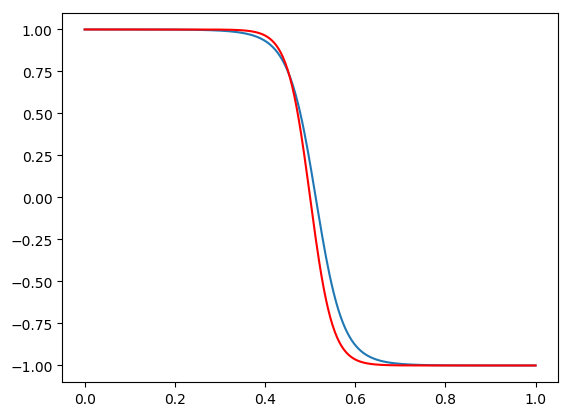

k= 1: 0.000041625814,	 0.982912862001
k= 2: 0.000011372225,	 0.665794128298
k= 3: 0.000006671248,	 0.039292389065
k= 4: 0.000000030047,	 0.000111411420


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x140a51590>

In [73]:
x=linspace(0,1,401)
u=zeros(401)

h=x[2]-x[1]
ϵ=0.025

#specify the boundary conditions
u[1]=1.0
u[end]=-1.0

GaussSeidel_Burgers!(u,h,ϵ,4*4*250)

#u[2:end-1]=2.0*(rand(length(u)-2)-0.5)

plot(x, u)

NewtonB!(u, FBurgers, JFBurgers, h, ϵ, nitrs=30, tol=1e-12)

plot(x, u,"r")


## Gripes about Newton's method

* Sensitive to initial guesses
* Cost for evaluation of the Jacobian matrix $f^\prime(x)=(f_1(x),f_2(x),\cdots,f_N(x))^\top$ (we also used the notation $Jf(x)$): 

    For $x\in \mathbb{R}^N$, the cost for evaluating $f^\prime(x)$ ranges from $O(N^2)$, when each component of $f$ depends only on a few components of $x$, to $O(N^3)$, when each component of $f$ depends on all the component of $x$.

* Cost for evaluation of $(f^\prime)^{-1})(x)$ is $O(N^3)$ in general, using Gaussian elimination based direct methods.
* The need to do the above two items at every update

## A convergence theorem for Newton's method

**Theorem**: Let $f:\mathbb{R}^n\mapsto \mathbb{R}^n$ be a $C^1$ function. Let $x^*$ be a solution to $f(x)=0$. Let $||x||$ denotes a vector norm of $x$ and $||A||$ be the associated operator norm for the matrix $A$. 

Suppose $(f')^{-1}(x)$ exists and that there exist positive constants $C,L$ and $R$ such that

$$ ||f'(x^*)||\le C,\,\,\,\, ||f'(x)-f'(y)||\le L||x-y||,\,\,\,\forall x,y\in B_R(x^*). $$ 

There exists $r>0$ such that for any $x_0\in B_r(x^*)$, the Newton's method yields

$$||x^{(k+1)}-x^k||\le CL\cdot||x^(k)-x^*||^2.$$

## Broyden's method -- a quasi-Newton method


**Newton's method is too computationally costly because of the evaluation of the Jacobian matrix and inverting it at every step. We can make it cheaper by approximating the Jacobina matrix somehow**

* A generalization of the secant method
* **Low-rank update of the Jacobian matrix**

Notation: $ J(x_n):=\frac{\partial f}{\partial x}(x_n) $

(Ignore Burden-Faires. See Wikipedia's description of [Broyden's method](https://en.wikipedia.org/wiki/Broyden%27s_method) )

**IDEA 1**: (**Secant method**) Approximate $J(x_n)$ by a matrix $A_n$ along the direction $x_n-x_{n-1}$.


$$y_n:=f(x_n)-f(x_{n-1})=:\Delta f_n,$$

$$s_n:=x_n-x_{n-1}=:\Delta x_n,$$

Find $A_n$ such that $$A_n\Delta x_n = \Delta f_n\approx J(x_n)\Delta x_n.$$

**IDEA 2**: Relate $A_n$ to $A_{n-1}$, $x_n$, $x_{n-1}$, $f(x_n)$ and $f(x_{n-1})$.

Solve

$$ \min_{A}||A-A_{n-1}||_F\,\,s.t.\,\, A\Delta x_n = \Delta f_n,$$

and derive a **low-rank update** formula:

$$A_n = A_{n-1}+\frac{\Delta f_n-A_{n-1}\Delta x_n}{|\Delta x_n|}\left(\frac{\Delta x_n}{|\Delta x_n|}\right)^\top.$$

In other words, we have the form $A_n=A_{n-1}+uv^\top$. **What's low-rank? $uv^\top$ is a rank-1 matrix.**


**IDEA 3**: Sherman-Morrison-Woodbury formula for:

**updating $A_n^{-1}$ from $A_{n-1}^{-1}$, $x_n$, $x_{n-1}$, $f(x_n)$ and $f(x_{n-1})$**

($B=A_{n-1}$)

$$ (B+uv^\top)^{-1} = \left(I-wv^\top\right)B^{-1},\,\,\, w:=\frac{(B^{-1}u)}{1+v^\top B^{-1} u}$$

This means

$$ A_n^{-1} := \left(I +  \frac{ \Delta x - A_{n-1}^{-1}\Delta f}{ \Delta x^\top A_{n-1}^{-1}\Delta f  }\Delta x^\top\right)A_{n-1}^{-1}$$

(Ignore Burden-Faire. See GGK p155 for more in-depth exposition.)

**Superlinear convergence**: $$\lim_{n\rightarrow\infty} \frac{e_n}{e_{n-1}} =0. $$

Learning objectives:
* Know the three ideas used in Broyden's method.
* Know Sherman-Morrison-Woodbury formula and how to prove it.
* Know the computational complexity of Broyden's method, in particular, compared to the straight forward Newton's method.
* Know how fast Broyden's method converges.

### Algorithm 1

(Without low-rank update of the inverse of the "Jacobian" matrix $A_n$)

$$A_n = A_{n-1}+\frac{\Delta f_n-A_{n-1}\Delta x_n}{|\Delta x_n|}\left(\frac{\Delta x_n}{|\Delta x_n|}\right)^\top.$$

Inputs: $A_0, x_0, f(x)$

For $n=0,1,2,\cdots$
1. Solve $A_n\Delta x =-f(x_n)$
2. $x_{n+1}:=x_n+\Delta x$
3. $\Delta f=f(x_{n+1})-f(x_n)$
4. Rank-1 update of the Jacobina matrix: $ A_{n+1}:=A_n+\frac{\left(\Delta f-A_n\Delta x\right)\Delta x}{\Delta x^\top \Delta x}$

In [ ]:
function Broyden_QuasiNewton!(x, F::Function, B::Array{Float64}; nitrs=10, tol=1e-12)
   
    for k in 1:nitrs
        f=F(x)

        #Solve BΔx=-F(x)  for Δx
        Δx=-B\f

        #Update x
        x.+=Δx
        
        #Evaluate F at new x
        fnew=F(x)
        
        if norm(f)>tol
            
            Δf=fnew.-f
            
            #rank-1 update of B
            B.+= (Δf-B*Δx)*Δx'./(Δx'Δx)
        else
           break 
        end
        
        @printf "k=%2d: %1.12f,\t %1.12f\n" k norm(f) norm(Δx)
    end
end

### Algorithm 2

(Using low rank update on the inverse of the "Jacobian" matrix $A_{n}^{-1}$)

$$ A_n^{-1} := \left(I +  \frac{ \Delta x - A_{n-1}^{-1}\Delta f}{ \Delta x^\top A_{n-1}^{-1}\Delta f  }\Delta x^\top\right)A_{n-1}^{-1}$$

Inputs: $A_0, x_0, f(x)$

In [ ]:
function Broyden_QuasiNewton2!(x, F::Function, B::Array{Float64}; nitrs=10, tol=1e-12)
   
    Binv=B^(-1)
    for k in 1:nitrs
        f=F(x)
        
        if norm(f)<tol
            break
        end

        #Solve BΔx=-F(x)  for Δx
        Δx=-Binv*f

        #Update x
        x.+=Δx
        
        #Evaluate F at new x
        fnew=F(x)
                    
        Δf=fnew.-f
            
        #rank-1 update of Binv
        BinvΔf=Binv*Δf
        
        Binv.+= (Δx-BinvΔf)*Δx'/(Δx'BinvΔf)*Binv
        
        @printf "k=%2d: %1.12f,\t %1.12f\n" k norm(f) norm(Δx)
    end
end

#### A simple example

In [ ]:
F(x)=[ x[1]^2+x[2]^2-2.0; exp(x[1]-1.0)+x[2]^3-2.0]

JF(x)=[ 2x[1] 2x[2]; exp(x[1]-1.0) 3x[2]^2]

x0=[1.5; 2.0]

x=copy(x0)
A=JF(x)

println("Newton's method")
@time Newton!(x, F, JF)

println()
x.=x0
println("Broyden's method 1")
@time Broyden_QuasiNewton!(x, F, A)

println()
x.=x0
A=JF(x)
println("Broyden's method 2")
@time Broyden_QuasiNewton2!(x, F, A)

For this problem, we see that Algorithm 1 and Algorithm 2 take longer time than Newton's method. When do you expect that they become faster?